In [18]:
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

## Data Preparation for MNIST Dataset:

This code will use the `load_data()` function from the `tf.keras.datasets.mnist` module to load the MNIST dataset. Subsequently, it will apply normalization by flattening the images and dividing the pixel values by 255. Finally, it will display the shapes of the flattened datasets.

### Loading the MNIST Dataset:
The code will utilize the `load_data()` function from `tf.keras.datasets.mnist` to load the MNIST dataset. This dataset is widely used for handwritten digit image classification.

### Flattening Images:
The dataset's images will be flattened using the `reshape` method to make them compatible with a machine learning model. The original images have a three-dimensional shape, and this step will transform them into a two-dimensional array where each row represents an image.


In [19]:
# Load the MNIST dataset
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Flatten the training and testing data
flat_x_train = x_train.reshape(x_train.shape[0], -1)
flat_x_test = x_test.reshape(x_test.shape[0], -1)


### Normalization:
Pixel values will be normalized by dividing each value by 255. This will scale the pixel values to the range [0, 1], a common practice to enhance model training convergence.

### Displaying Shapes:
Finally, the code will print the shapes of the flattened datasets using the `print` function. This will help verify the dimensions of the training and testing sets after the transformations.

In [20]:


# Normalize pixel values to the range [0, 1]
flat_x_train = flat_x_train.astype(float)/255
flat_x_test = flat_x_test.astype(float)/255

# Display the shapes of flattened datasets
print("flat_x_test.shape : ", flat_x_train.shape)
print("flat_x_test.shape : ", flat_x_test.shape)

flat_x_test.shape :  (60000, 784)
flat_x_test.shape :  (10000, 784)


 **Sequential Model:**
  - A sequential model is chosen here because it is suitable for simple and linear architectures. It is well-suited for tasks where data can be passed through the network layer by layer sequentially, without requiring complex connections between different parts of the network.

**Dense Layer:**
  - The dense layer is used to allow each neuron to be connected to every neuron in the previous layer. This provides flexibility to learn complex relationships in the data. In this case, with 10 units and softmax activation, the dense layer is suitable for multiclass classification.


In [21]:
import tensorflow as tf

# Create a sequential model
model = tf.keras.models.Sequential()

# Commented-out layers that are excluded from training
# model.add(tf.keras.layers.Dense(225, activation="relu"))
# model.add(tf.keras.layers.Dense(128, activation="relu"))

# Add a Dense layer with 10 neurons for classification using softmax activation
model.add(tf.keras.layers.Dense(10, activation="softmax"))

- **TensorBoard Callback:**
  - TensorBoard provides real-time visualization of training metrics, which is extremely useful for understanding how the model learns over time. Using TensorBoard helps detect potential training issues, monitor model convergence, and adjust hyperparameters accordingly.

- **Model Compilation:**
  - **Loss Function (`loss`):**
    -   The `sparse_categorical_crossentropy` loss function is appropriate for multiclass classification problems. It measures the gap between model-predicted probabilities and true labels, crucial for guiding the optimizer.
  - **Optimizer (`optimizer`):**
    -   The `adam` optimizer is chosen as it dynamically adapts during training, adjusting learning rates for each parameter. This makes it effective for quickly converging to a global minimum while avoiding some of the issues associated with fixed learning rates.
  - **Metrics (`metrics`):**
    -  The "accuracy" metric is a common choice for classification tasks. It provides an easily interpretable measure of model performance in terms of the percentage of correct predictions.


In [22]:
# Callback to record information for TensorBoard
tf_callback = tf.keras.callbacks.TensorBoard("logs/", histogram_freq=1)

# Compile the model with the loss function, optimizer, and metrics
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

# Train the model on the data with the TensorBoard callback
history = model.fit(flat_x_train, y_train, epochs=5, callbacks=[tf_callback])

Epoch 1/5
1875/1875 [==============================] - 52s 5ms/step - loss: 0.4675 - accuracy: 0.8781
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3038 - accuracy: 0.9151
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2834 - accuracy: 0.9209
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2735 - accuracy: 0.9235
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2666 - accuracy: 0.9253


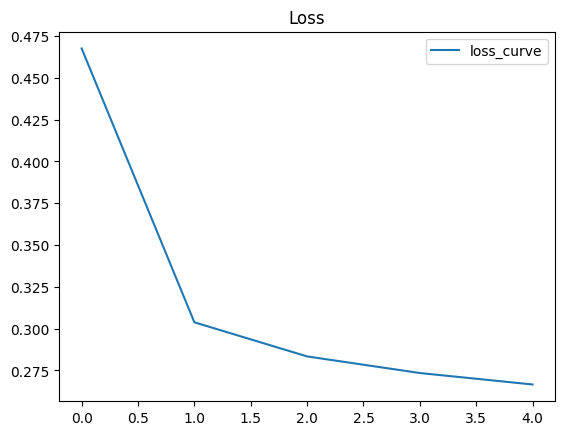

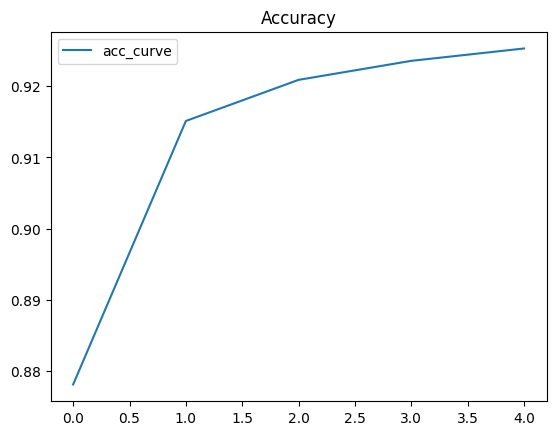

In [23]:
import matplotlib.pyplot as plt

loss_curve = history.history["loss"]
acc_curve = history.history["accuracy"]

# Plotting the Loss curve
plt.plot(loss_curve, label="loss_curve")
plt.title("Loss")
plt.legend()  # Add this line to display the legend
plt.show()

# Plotting the Accuracy curve
plt.plot(acc_curve, label="acc_curve")
plt.title("Accuracy")
plt.legend()  # Add this line to display the legend
plt.show()


In [24]:
# Make predictions on the test dataset
y_test_prediction = model.predict(flat_x_test)

# Evaluate the model on the test dataset
evaluation = model.evaluate(flat_x_test, y_test)
tested_loss, tested_accuracy = evaluation

# Display the evaluation results
print("Model evaluation with the test dataset:")
print("Accuracy:", round(tested_accuracy, 4))
print("Loss:", round(tested_loss, 4))


313/313 [==============================] - 1s 2ms/step - loss: 0.2694 - accuracy: 0.9244
Model evaluation with the test dataset:
Accuracy: 0.9244
Loss: 0.2694


# Confusion matrix


The confusion matrix is a crucial tool for evaluating the performance of a classification model by comparing its predictions with the actual classes in a dataset. In a multiclass classification, the confusion matrix utilizes a horizontal axis to represent predicted classes and a vertical axis to represent actual classes. True positives (TP), located on the main diagonal, indicate correct predictions, while false positives (FP) outside the diagonal signify classification errors where the model incorrectly predicted a positive outcome. 

The code below calculates a confusion matrix based on the model's predictions (y_predicted_labels) and the true labels (y_test). It then uses the seaborn library to create a heatmap visualization of the matrix, with annotations for each cell displaying the number of occurrences. The x-axis represents the predicted classes, and the y-axis represents the true classes. This graphical representation provides a clear overview of the model's performance across different classes.

Text(95.72222222222221, 0.5, 'Truth')

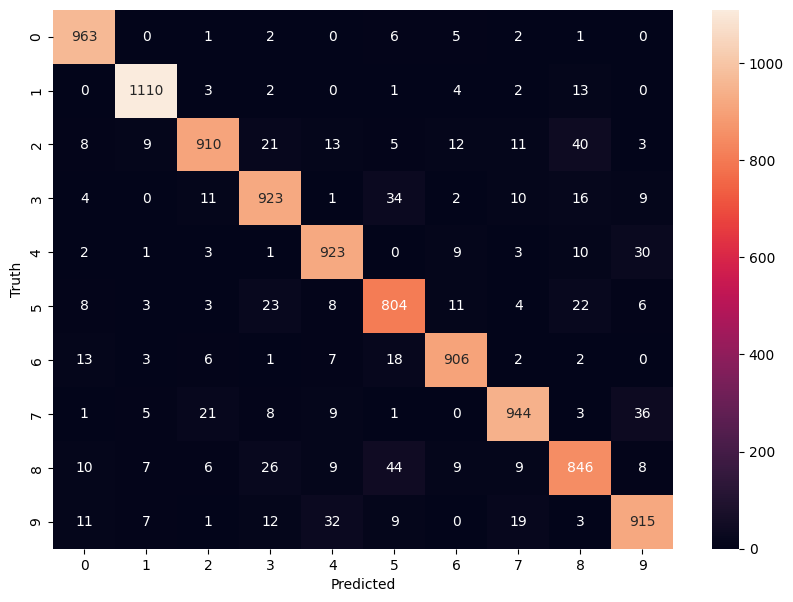

In [25]:

# Extracting predicted labels from the model's predictions
y_predicted_labels = [np.argmax(i) for i in y_test_prediction]

# Generating a confusion matrix using TensorFlow
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

# Creating a heatmap visualization of the confusion matrix using seaborn
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d')

# Adding labels to the plot
plt.xlabel('Predicted')
plt.ylabel('Truth')


Model prediction for:
Model prediction for the below image is: 5


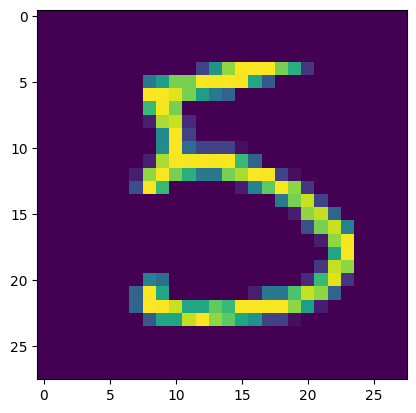

In [16]:
# Specify the index of the example in the test set to evaluate
evaluation_index = 15

# Display the image from the test set corresponding to the specified index
plt.imshow(x_test[evaluation_index])

# Calculate the index with the highest predicted probability for the specified image
ind = np.argmax(y_test_prediction[evaluation_index])

print("Model prediction for the below image is:", ind)
